## 微信红包群抢红包数据分析
规则：在一个红包群中，大家合伙抢红包，抢得金额最多的人要发下一次红包。每个红包的金额都是 10 块钱，每个红包的数量都是 8 个。实验中一共进行了 26 次发红包。那么，进行多轮抢红包以后，谁赚钱了呢？手气最佳的赚钱了吗？

In [1]:
# -*- coding:utf-8 -*- 
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# 从 excel 表格中导入数据
file_name = 'data/hongbao.xlsx'
df_all = pd.read_excel(file_name, )

# 看看数据格式
df_all.head()

,packet_id,rank,name,money
0,1,8,F1,2.27
1,1,7,F2,0.82
2,1,6,F3,0.20
3,1,5,M1,2.19
4,1,4,F4,1.38


我把抢红包的信息记录在 Excel 表格中，如上面所示。第一列记录的是红包的 id，第二列记录按照抢红包的速度进行记录。下面统计整体的抢红包信息。

In [3]:
df_all.describe()

,packet_id,rank,money
count,208.000000,208.000000,208.000000
mean,13.500000,4.500000,1.250000
std,7.518094,2.296816,0.780155
min,1.000000,1.000000,0.080000
25%,7.000000,2.750000,0.607500
50%,13.500000,4.500000,1.115000
75%,20.000000,6.250000,1.810000
max,26.000000,8.000000,3.680000


# 总体分析

In [4]:
print  '=' * 25, u'总体分析', '=' * 25
arr_m = df_all['money'].values
# 总数
print u'红包总金额:', np.sum(arr_m)
# 总次数
hongbao_ids = df_all['packet_id'].unique()
print u'红包总数', len(hongbao_ids)
# 参与人数
man_ids = df_all['name'].unique()
print u'参与抢红包总人数', len(man_ids)
name_ss = u'参与人员：'
for each in man_ids:
    name_ss = name_ss + '  ' + each
print name_ss

# 平均每人能抢金额
print u'平均每人能抢金额%g元' % ( np.sum(arr_m) / len(man_ids))
# 所有红包中最大最小金额差距
m_max = np.max(arr_m)
m_min = np.min(arr_m)
print u'所有红包中最大最小金额差距', m_max - m_min
m_max_name = df_all['name'].values[np.argmax(arr_m)]
print u'获得最大红包金额的是,',m_max_name, m_max, u'元'
m_min_name = df_all['name'].values[np.argmin(arr_m)]
print u'获得最小红包金额的是,',m_min_name, m_min, u'元'

========================= 总体分析 =========================
红包总金额: 260.0
红包总数 26
参与抢红包总人数 12
参与人员：  F1  F2  F3  M1  F4  F5  M2  M3  F6  M4  M5  M6
平均每人能抢金额21.6667元
所有红包中最大最小金额差距 3.6
获得最大红包金额的是, F3 3.68 元
获得最小红包金额的是, M5 0.08 元


## 分析每个红包被抢的情况

In [5]:
print  '=' * 25, u'每个红包分析', '=' * 25

# 每个红包最大金额
all_max_money = list()
# 最小金额
all_min_money = list()
# 最大金额所在 rank
all_max_money_rank = list()
# 最小
all_min_money_rank = list()
# 最大金额获得者
all_max_money_name = list()
# 最小
all_min_money_name = list()
# 分析每个红包
def analyze_hongbao(packet_id):
    df_hongbao = df_all.loc[df_all['packet_id'] == packet_id]
    h_r = df_hongbao['rank'].values
    h_m = df_hongbao['money'].values   
    h_n = df_hongbao['name'].values
    # 最大金额
    max_money = np.max(h_m)
    # print max_money
    all_max_money.append(max_money)
    # 最大金额所在 rank
    max_money_rank = h_r[np.argmax(h_m)]
    # print max_money_rank
    all_max_money_rank.append(max_money_rank)
    # 最大金额获得者
    max_money_name = h_n[np.argmax(h_m)]
    # print max_money_name
    all_max_money_name.append(max_money_name)
    
    # 最大金额
    min_money = np.min(h_m)
#     print min_money
    all_min_money.append(min_money)
    # 最大金额所在 rank
    min_money_rank = h_r[np.argmin(h_m)]
#     print min_money_rank
    all_min_money_rank.append(min_money_rank)
    # 最大金额获得者
    min_money_name = h_n[np.argmin(h_m)]
#     print min_money_name
    all_min_money_name.append(min_money_name)
    print u'packet_id=%d-->最大最小金额差 %g' % (packet_id, max_money - min_money)
    print '最大金额',max_money_name, u'%g元\t rank=%d' % (max_money, max_money_rank)
    print '最小金额',min_money_name, u'%g元\t rank=%d' % (min_money, min_money_rank)
    print '-' * 50
    

for packet_id in hongbao_ids:
    analyze_hongbao(packet_id)
#　每个红包总结
all_hongbao_df = DataFrame({'packet_id': range(1, len(all_max_money) + 1), u'最大金额': all_max_money, u'最大金额得主': all_max_money_name,
                            u'最大金额rank': all_max_money_rank, u'最小金额': all_min_money, u'最小金额得主': all_min_money_name, u'最小金额rank': all_min_money_rank})
# hongbao_save_path = 'max_min.csv'
# all_hongbao_df.to_csv(hongbao_save_path, index=False, encoding='utf-8')

========================= 每个红包分析 =========================
packet_id=1-->最大最小金额差 2.19
最大金额 F5 2.39元	 rank=3
最小金额 F3 0.2元	 rank=6
--------------------------------------------------
packet_id=2-->最大最小金额差 1.88
最大金额 F1 2.23元	 rank=4
最小金额 M2 0.35元	 rank=7
--------------------------------------------------
packet_id=3-->最大最小金额差 1.93
最大金额 F1 2.13元	 rank=3
最小金额 F3 0.2元	 rank=8
--------------------------------------------------
packet_id=4-->最大最小金额差 3.17
最大金额 F1 3.25元	 rank=4
最小金额 M5 0.08元	 rank=7
--------------------------------------------------
packet_id=5-->最大最小金额差 2.38
最大金额 F5 2.46元	 rank=1
最小金额 M5 0.08元	 rank=8
--------------------------------------------------
packet_id=6-->最大最小金额差 2.62
最大金额 F3 2.75元	 rank=5
最小金额 F4 0.13元	 rank=7
--------------------------------------------------
packet_id=7-->最大最小金额差 3.05
最大金额 M1 3.17元	 rank=5
最小金额 F5 0.12元	 rank=2
--------------------------------------------------
packet_id=8-->最大最小金额差 1.77
最大金额 M2 2.4元	 rank=1
最小金额 M3 0.63元	 rank=3
-------------------

每个红包中最大金额和最小金额分别在第几个人抢的时候出现。

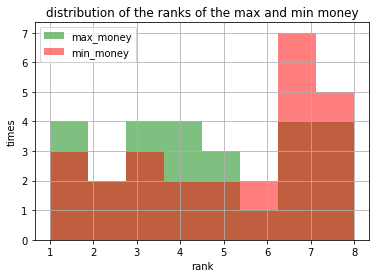

,packet_id,最大金额,最大金额rank,最大金额得主,最小金额,最小金额rank,最小金额得主
0,1,2.39,3,F5,0.20,6,F3
1,2,2.23,4,F1,0.35,7,M2
2,3,2.13,3,F1,0.20,8,F3
3,4,3.25,4,F1,0.08,7,M5
4,5,2.46,1,F5,0.08,8,M5
5,6,2.75,5,F3,0.13,7,F4
6,7,3.17,5,M1,0.12,2,F5
7,8,2.40,1,M2,0.63,3,M3
8,9,1.91,8,M2,0.41,7,M5
9,10,2.29,1,M6,0.13,8,M2


In [6]:
# 最大金额rank分布
# facecolor 设置颜色，alpha 设置透明度
plt.hist(all_max_money_rank, bins=8, facecolor='green', alpha=0.5, label='max_money')
plt.title(u'distribution of the ranks of the max_money')

# 最小金额rank分布
plt.hist(all_min_money_rank, bins=8, facecolor='red', alpha=0.5, label='min_money')
plt.title(u'distribution of the ranks of the max and min money')
plt.xlabel('rank')
plt.ylabel('times')
plt.grid()
plt.legend()
plt.show()

all_hongbao_df

**从上面的结果来看，抢红包的速度越快，获取金额比较稳定，越靠后面，方差越大，获得最佳手气或者最差手气的几率都要更大些。**

## 分析每个人抢红包的结果

In [7]:
print  '=' * 25, u'每个人分析', '=' * 25
# 每个人抢的次数
all_man_count =list()
# 每个人的总金额
all_man_all_money = list()
# 每个人平均金额
all_man_mean_money = list()
# 每个人的最大金额
all_man_max_money = list()
# 每个人的最小金额
all_man_min_money = list()

#  每个人的平均 rank
all_mean_rank = list()
all_max_rank = list()
all_min_rank = list()


def analyze_man(man_id):
    df_man = df_all.loc[df_all['name'] == man_id]
    m_r = df_man['rank'].values
    m_m = df_man['money'].values   
    m_count = len(m_r) # 抢得次数
    m_all_money = np.sum(m_m) # 总金额
    m_mean_money = np.mean(m_m) # 每次平均金额
    m_max_money = np.max(m_m) # 最大金额
    m_min_money = np.min(m_m) # 最小金额

    m_mean_rank = np.mean(m_r)
    m_max_rank = np.max(m_r)
    m_min_rank = np.min(m_r)
#     print man_id, u'一共抢了', m_count, u'次红包'
#     print 'all_money=%g，mean_money=%g, max_money=%g, min_money=%g' % (m_all_money, m_mean_money, m_max_money, m_min_money)

    all_man_count.append(m_count)
    all_man_all_money.append(m_all_money)
    all_man_mean_money.append(m_mean_money)
    all_man_max_money.append(m_max_money)
    all_man_min_money.append(m_min_money)

    all_mean_rank.append(m_mean_rank)
    all_max_rank.append(m_max_rank)
    all_min_rank.append(m_min_rank)
    
for man_id in man_ids:
    analyze_man(man_id)
print u'抢红包最多的是', man_ids[np.argmax(all_man_count)], u'一共%d次' % np.max(all_man_count) 
print u'抢红包最少的是', man_ids[np.argmin(all_man_count)], u'一共%d次' % np.min(all_man_count) 
print u'抢的金额最多的是', man_ids[np.argmax(all_man_all_money)], u'一共%g元' % np.max(all_man_all_money)
print u'抢的金额最少的是', man_ids[np.argmin(all_man_all_money)], u'一共%g元' % np.min(all_man_all_money)
print u'抢得最快的是', man_ids[np.argmin(all_mean_rank)], u'平均排行', np.min(all_mean_rank)
print u'抢得最慢的是', man_ids[np.argmax(all_mean_rank)], u'平均排行', np.max(all_mean_rank)

all_man_df = DataFrame({'name': man_ids, u'总金额': all_man_all_money, u'平均金额': all_man_mean_money, u'最大金额': all_man_max_money,
                       u'最小金额': all_man_min_money, u'总次数': all_man_count, u'rank平均': all_mean_rank, u'rank最大': all_max_rank, u'rank最小':all_min_rank})
# man_save_path = 'man.csv'
# all_man_df.to_csv(man_save_path, index=False, encoding='utf-8')
all_man_df

========================= 每个人分析 =========================
抢红包最多的是 F5 一共26次
抢红包最少的是 F2 一共1次
抢的金额最多的是 F5 一共33.18元
抢的金额最少的是 F2 一共0.82元
抢得最快的是 M6 平均排行 3.05
抢得最慢的是 M5 平均排行 7.15384615385


,name,rank平均,rank最大,rank最小,平均金额,总次数,总金额,最大金额,最小金额
0,F1,4.200000,8,2,2.072000,5,10.360,3.25,0.48
1,F2,7.000000,7,7,0.820000,1,0.820,0.82,0.82
2,F3,5.523810,8,1,1.278095,21,26.840,3.68,0.12
3,M1,5.315789,8,2,1.371053,19,26.050,3.17,0.09
4,F4,5.086957,8,1,1.138696,23,26.190,2.50,0.13
5,F5,3.153846,7,1,1.276154,26,33.180,2.58,0.12
6,M2,5.500000,8,1,1.155000,12,13.860,2.45,0.13
7,M3,3.615385,8,1,1.205962,26,31.355,2.28,0.10
8,F6,5.352941,8,1,1.131765,17,19.240,3.30,0.16
9,M4,3.480000,8,1,1.240400,25,31.010,2.56,0.19


统计每个人最佳手气的次数，最佳手气的人需要发下一个红包。假设第一个红包是最后一个最佳手气发的，那么可以统计每个人最后赚钱了还是亏钱了。

In [8]:
# 每个最佳手气发的红包总金额
sr_best = all_hongbao_df[u'最大金额得主']
sr_best_count = sr_best.value_counts()
dict_best_count = dict()
for i in range(len(sr_best_count)):
    k = sr_best_count.index[i]
    v = sr_best_count.values[i]
    dict_best_count[k] = v
# 每个人抢到的总金额
sr_earn = pd.Series(all_man_df[u'总金额'].values, index=all_man_df[u'name'].values)
sr_rank = pd.Series(all_man_df[u'rank平均'].values, index=all_man_df[u'name'].values)   
man_pays = list()
man_earns = list()
man_ranks = list()
for man_id in man_ids:
    man_pays.append(dict_best_count.get(man_id, 0) * 10.0)
    man_earns.append(sr_earn[man_id])
    man_ranks.append(sr_rank[man_id])
final_earns = np.asarray(man_earns) - np.asarray(man_pays)
final_earns = final_earns.tolist()

df_final_earns = pd.DataFrame({'man_id': man_ids, 'pay': man_pays, 'earn': man_earns, 
                               'final_earn': final_earns, 'man_rank': man_ranks})
df_final_earns = df_final_earns.loc[:, ['man_id', 'man_rank', 'pay', 'earn', 'final_earn']]
df_by_ranks = df_final_earns.sort_values('man_rank')
df_by_lucky = df_final_earns.sort_values('pay', ascending=False)

In [9]:
df_by_ranks

,man_id,man_rank,pay,earn,final_earn
11,M6,3.050000,30.0,29.085,-0.915
5,F5,3.153846,50.0,33.180,-16.820
9,M4,3.480000,20.0,31.010,11.010
7,M3,3.615385,10.0,31.355,21.355
0,F1,4.200000,30.0,10.360,-19.640
4,F4,5.086957,10.0,26.190,16.190
3,M1,5.315789,20.0,26.050,6.050
8,F6,5.352941,10.0,19.240,9.240
6,M2,5.500000,30.0,13.860,-16.140
2,F3,5.523810,40.0,26.840,-13.160


**根据手速分析，并没有体现出手速能够帮助自己赚到钱。**

In [10]:
df_by_lucky

,man_id,man_rank,pay,earn,final_earn
5,F5,3.153846,50.0,33.180,-16.820
2,F3,5.523810,40.0,26.840,-13.160
0,F1,4.200000,30.0,10.360,-19.640
6,M2,5.500000,30.0,13.860,-16.140
11,M6,3.050000,30.0,29.085,-0.915
3,M1,5.315789,20.0,26.050,6.050
9,M4,3.480000,20.0,31.010,11.010
4,F4,5.086957,10.0,26.190,16.190
7,M3,3.615385,10.0,31.355,21.355
8,F6,5.352941,10.0,19.240,9.240


**结果表明：手气特别好的人，一般最后亏钱都是比较多的（掩脸）**

哈哈哈，end